<a href="https://colab.research.google.com/github/joalissoncm/cancerparaiba/blob/main/analise_estatistica_cancerPB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importando as bibliotecas necessárias.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()

Taxas de mortalidade pelas topografias selecionadas*, brutas e ajustadas por idade, pelas populações mundial e brasileira de 2010, por 100.000 homens e mulheres, na região Nordeste, entre 2015 e 2019.

In [ ]:
#Importando os dados que tirei do Instituto Nacional de Câncer(INCA).
dados = pd.read_csv("https://raw.githubusercontent.com/joalissoncm/cancerparaiba/main/dataset/1cancer_stats%20-%20Modelo05_20220311082945%20(1).csv")

In [ ]:
#Conferindo se os dados não tem dados nulos.
dados.dtypes

LOCALIDADE         object
TAXA1              object
TAXA2              object
TAXA3              object
TAXA4              object
TAXA5              object
TAXA6              object
TAXA7              object
TAXA8              object
TAXA9              object
TAXA10             object
TAXA11             object
Idade ignorada     object
TAXA BRUTA         object
Classificação      object
Pop. Mundial(1)    object
Pop. Brasil(2)     object
dtype: object

In [ ]:
#Conferindo as dimensões do data frame.
print("DIMENSÕES DO DATAFRAME:")
print("Linhas:\t\t{}".format(dados.shape[0]))
print("Colunas:\t{}".format(dados.shape[1]))

DIMENSÕES DO DATAFRAME:
Linhas:		10
Colunas:	17


In [ ]:
#Verificando se não tem valores duplicados
print("Duplicated values: ", dados.duplicated().sum())

Duplicated values:  0


In [ ]:
dados.isnull().sum()

LOCALIDADE         0
TAXA1              0
TAXA2              0
TAXA3              0
TAXA4              0
TAXA5              0
TAXA6              0
TAXA7              0
TAXA8              0
TAXA9              0
TAXA10             0
TAXA11             0
Idade ignorada     0
TAXA BRUTA         0
Classificação      0
Pop. Mundial(1)    0
Pop. Brasil(2)     0
dtype: int64

In [ ]:
#Finalmente observando as informações
dados.head(10)

,LOCALIDADE,TAXA1,TAXA2,TAXA3,TAXA4,TAXA5,TAXA6,TAXA7,TAXA8,TAXA9,TAXA10,TAXA11,Idade ignorada,TAXA BRUTA,Classificação,Pop. Mundial(1),Pop. Brasil(2)
0,LOCALIDADE,00 a 04,05 a 09,10 a 14,15 a 19,20 a 29,30 a 39,40 a 49,50 a 59,60 a 69,70 a 79,80 ou mais,Idade ignorada,Taxa Bruta,Classificação,Pop. Mundial(1),Pop. Brasil(2)
1,AL,0,0,"0,06","0,25","1,66","6,6","22,11","51,52","106,71","214,23","427,25",0,"24,68",8,"26,54","29,21"
2,BA,"0,03","0,02","0,06","0,2","1,01","6,34","19,85","47,91","111,81","219,58","476,45",0,"29,24",7,"26,82","29,65"
3,CE,"0,03",0,"0,05","0,17","1,23","7,45","22,49","62,02","141,77","295,95","605,43",0,"36,99",1,"34,25","37,85"
4,MA,"0,03","0,03","0,19","0,18","1,32","8,25","22,15","49,59","111,7","235,01","422,85",0,"23,57",4,"27,46","30,15"
5,PB,"0,06",0,0,"0,43","1,34","6,55","20,58","50,01","118,84","238,67","532,27",0,"33,41",2,"28,82","31,96"
6,PE,0,"0,03","0,02","0,25","1,46","7,85","23,68","60,59","135,55","277,03","588,48",0,"35,78",5,"33,18","36,72"
7,PI,0,0,0,"0,28","1,63","8,51","21,71","51,17","130,12","268,96","613,7",0,"32,79",3,"31,83","35,48"
8,RN,"0,15",0,0,"0,34","1,31","6,74","20,92","59,53","132,87","276,6","566,34",0,"35,78",6,"32,17","35,53"
9,SE,0,0,0,"0,19","1,31","9,75","23,09","63,72","129,02","270,36","586,55",0,"31,1",0,"32,91","36,57"


## **Explorando os dados**
Partindo para a análise estatística e exploratória

#### Números de casos de câncers entre pessoas de 0 a 4 anos divididos por estado

In [ ]:
dados.groupby(['LOCALIDADE']).TAXA1.max().sort_values(ascending=False)[:12]

LOCALIDADE
LOCALIDADE    00 a 04
RN               0,15
PB               0,06
BA               0,03
CE               0,03
MA               0,03
AL                  0
PE                  0
PI                  0
SE                  0
Name: TAXA1, dtype: object

#### Números de casos de câncers entre pessoas de 5 a 9 anos divididos por estado

In [ ]:
dados.groupby(['LOCALIDADE']).TAXA2.max().sort_values(ascending=False)[:12]

LOCALIDADE
LOCALIDADE    05 a 09
MA               0,03
PE               0,03
BA               0,02
AL                  0
CE                  0
PB                  0
PI                  0
RN                  0
SE                  0
Name: TAXA2, dtype: object

#### Números de casos de câncers entre pessoas de 10 a 14 anos divididos por estado

In [ ]:
dados.groupby(['LOCALIDADE']).TAXA3.max().sort_values(ascending=False)[:12]

LOCALIDADE
-     10 a 14
MA       0,19
AL       0,06
BA       0,06
CE       0,05
PE       0,02
PB          0
PI          0
RN          0
SE          0
Name: TAXA3, dtype: object

#### Números de casos de câncers entre pessoas de 15 a 19 anos divididos por estado

In [ ]:
dados.groupby(['LOCALIDADE']).TAXA4.max().sort_values(ascending=False)[:12]

LOCALIDADE
-     15 a 19
PB       0,43
RN       0,34
PI       0,28
AL       0,25
PE       0,25
BA        0,2
SE       0,19
MA       0,18
CE       0,17
Name: TAXA4, dtype: object

#### Números de casos de câncers entre pessoas de 20 a 29 anos divididos por estado

In [ ]:
dados.groupby(['LOCALIDADE']).TAXA5.max().sort_values(ascending=False)[:12]

LOCALIDADE
-     20 a 29
AL       1,66
PI       1,63
PE       1,46
PB       1,34
MA       1,32
RN       1,31
SE       1,31
CE       1,23
BA       1,01
Name: TAXA5, dtype: object

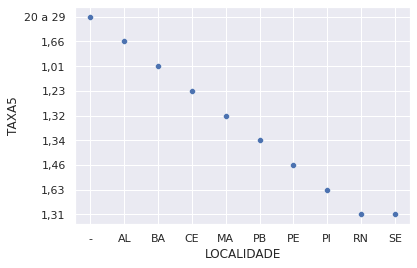

In [ ]:
#Gráfico da TAXA5 dividido por estados.
sns.scatterplot(data=dados, x= 'LOCALIDADE', y = 'TAXA5')

#### Números de casos de câncers entre pessoas de 30 a 39 anos divididos por estado

In [ ]:
dados.groupby(['LOCALIDADE']).TAXA6.max().sort_values(ascending=False)[:12]

LOCALIDADE
SE       9,75
PI       8,51
MA       8,25
PE       7,85
CE       7,45
RN       6,74
AL        6,6
PB       6,55
BA       6,34
-     30 a 39
Name: TAXA6, dtype: object

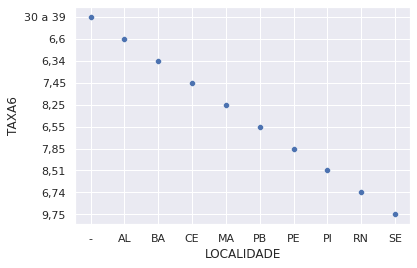

In [ ]:
#Gráfico da TAXA6 dividido por estados.
sns.scatterplot(data=dados, x= 'LOCALIDADE', y = 'TAXA6')

#### Números de casos de câncers entre pessoas de 40 a 49 anos divididos por estado

In [ ]:
dados.groupby(['LOCALIDADE']).TAXA7.max().sort_values(ascending=False)[:12]

LOCALIDADE
-     40 a 49
PE      23,68
SE      23,09
CE      22,49
MA      22,15
AL      22,11
PI      21,71
RN      20,92
PB      20,58
BA      19,85
Name: TAXA7, dtype: object

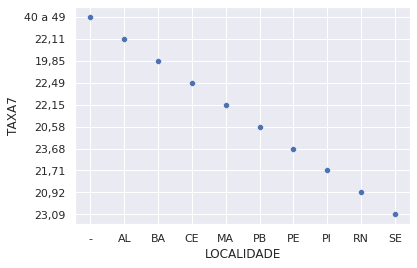

In [ ]:
#Gráfico da TAXA7 dividido por estados.
sns.scatterplot(data=dados, x= 'LOCALIDADE', y = 'TAXA7')

#### Números de casos de câncers entre pessoas de 50 a 59 anos divididos por estado

In [ ]:
dados.groupby(['LOCALIDADE']).TAXA8.max().sort_values(ascending=False)[:10]

LOCALIDADE
SE      63,72
CE      62,02
PE      60,59
RN      59,53
AL      51,52
PI      51,17
PB      50,01
-     50 a 59
MA      49,59
BA      47,91
Name: TAXA8, dtype: object

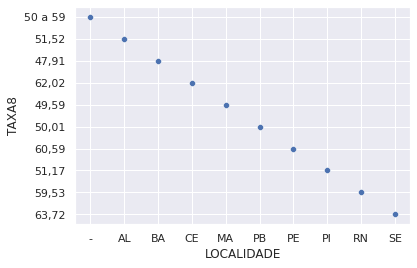

In [ ]:
#Gráfico da TAXA8 dividido por estados.
sns.scatterplot(data=dados, x= 'LOCALIDADE', y = 'TAXA8')

#### Números de casos de câncers entre pessoas de 60 a 69 anos divididos por estado

In [ ]:
dados.groupby(['LOCALIDADE']).TAXA9.max().sort_values(ascending=False)[:10]

LOCALIDADE
-     60 a 69
CE     141,77
PE     135,55
RN     132,87
PI     130,12
SE     129,02
PB     118,84
BA     111,81
MA      111,7
AL     106,71
Name: TAXA9, dtype: object

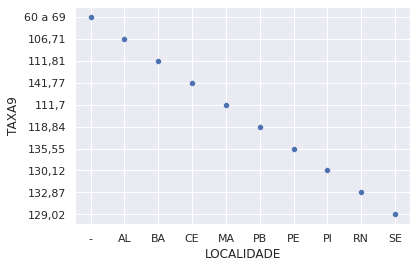

In [ ]:
#Gráfico da TAXA9 dividido por estados.
sns.scatterplot(data=dados, x= 'LOCALIDADE', y = 'TAXA9')

#### Números de casos de câncers entre pessoas de 70 a 79 anos divididos por estado

In [ ]:
dados.groupby(['LOCALIDADE']).TAXA10.max().sort_values(ascending=False)[:10]

LOCALIDADE
-     70 a 79
CE     295,95
PE     277,03
RN      276,6
SE     270,36
PI     268,96
PB     238,67
MA     235,01
BA     219,58
AL     214,23
Name: TAXA10, dtype: object

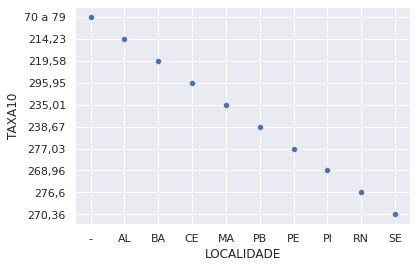

In [ ]:
#Gráfico da TAXA10 dividido por estados.
sns.scatterplot(data=dados, x= 'LOCALIDADE', y = 'TAXA10')

#### Números de casos de câncers entre pessoas de 80 ou mais anos divididos por estado

In [ ]:
dados.groupby(['LOCALIDADE']).TAXA11.max().sort_values(ascending=False)[:10]

LOCALIDADE
-     80 ou mais
PI         613,7
CE        605,43
PE        588,48
SE        586,55
RN        566,34
PB        532,27
BA        476,45
AL        427,25
MA        422,85
Name: TAXA11, dtype: object

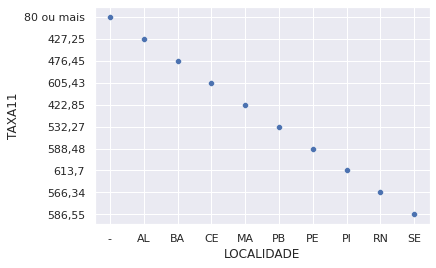

In [ ]:
#Gráfico da TAXA11 dividido por estados.
sns.scatterplot(data=dados, x= 'LOCALIDADE', y = 'TAXA11')

In [ ]:
#Consultando todos os dados pelo Estado
dados[dados['LOCALIDADE']  == 'PB']

,LOCALIDADE,TAXA1,TAXA2,TAXA3,TAXA4,TAXA5,TAXA6,TAXA7,TAXA8,TAXA9,TAXA10,TAXA11,Idade ignorada,TAXA BRUTA,Classificação,Pop. Mundial(1),Pop. Brasil(2)
5,PB,"0,06",0,0,"0,43","1,34","6,55","20,58","50,01","118,84","238,67","532,27",0,"33,41",2,"28,82","31,96"
